In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
import cv2
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_set = train_datagen.flow_from_directory('C:\\Users\\Arpitha Ananth\\Documents\\Programming in Data Science\\Practice Py\\Knowledge Base\\Face Recognition\\Mask Recogonition\\data\\Train Data',
                                               target_size=(64, 64),class_mode='binary')
test_set = test_datagen.flow_from_directory('C:\\Users\\Arpitha Ananth\\Documents\\Programming in Data Science\\Practice Py\\Knowledge Base\\Face Recognition\\Mask Recogonition\\data\\Test Data',
                                            target_size=(64, 64),class_mode='binary')

Found 958 images belonging to 2 classes.
Found 406 images belonging to 2 classes.


In [4]:
classifier = Sequential()
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Conv2D(32,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Flatten())
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6273      
Total params: 26,529
Trainable params: 26,529
Non-trainable params: 0
__________________________________________________

In [6]:
history= classifier.fit_generator(
        train_set,
        epochs=10,
        steps_per_epoch=30,
        shuffle=True,
        validation_data=test_set)


Epoch 1/10
30/30 [==============================] - 4s 136ms/step - loss: 0.5824 - accuracy: 0.7223 - val_loss: 0.3948 - val_accuracy: 0.8276
Epoch 2/10
30/30 [==============================] - 4s 129ms/step - loss: 0.2303 - accuracy: 0.9228 - val_loss: 0.3020 - val_accuracy: 0.9163
Epoch 3/10
30/30 [==============================] - 4s 118ms/step - loss: 0.1313 - accuracy: 0.9541 - val_loss: 0.0305 - val_accuracy: 0.9458
Epoch 4/10
30/30 [==============================] - 4s 131ms/step - loss: 0.1041 - accuracy: 0.9645 - val_loss: 0.0855 - val_accuracy: 0.9507
Epoch 5/10
30/30 [==============================] - 3s 111ms/step - loss: 0.0877 - accuracy: 0.9718 - val_loss: 0.0494 - val_accuracy: 0.9655
Epoch 6/10
30/30 [==============================] - 4s 138ms/step - loss: 0.0771 - accuracy: 0.9770 - val_loss: 0.1028 - val_accuracy: 0.9754
Epoch 7/10
30/30 [==============================] - 4s 118ms/step - loss: 0.0747 - accuracy: 0.9802 - val_loss: 0.0243 - val_accuracy: 0.9754
Epoch

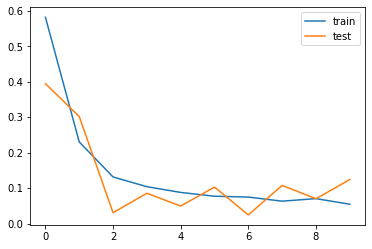

In [7]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

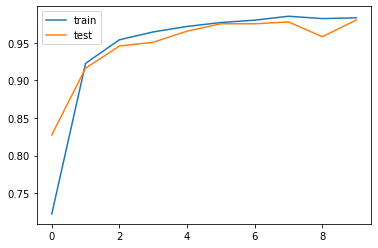

In [8]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [9]:
face_cascade = cv2.CascadeClassifier(r'C:\Users\Arpitha Ananth\Documents\Programming in Data Science\Practice Py\Knowledge Base\Computer Vision\Module_1_Face_Recognition\haarcascade_frontalface_default.xml')

In [29]:
video_capture = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'DIVX') 
out = cv2.VideoWriter('check1.mp4', fourcc, 15.0, (640, 480)) 

while True:
    ret,frame =video_capture.read() 
    res_frame = cv2.resize(frame, (frame.shape[1] // 4, frame.shape[0] //4))
    faces = face_cascade.detectMultiScale(res_frame)
    for f in faces:
        (x, y, w, h) = [v * 4 for v in f] 
        face_img = frame[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(64,64))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,64,64,3))
        reshaped = np.vstack([reshaped])
        result=classifier.predict(reshaped)
        if result >= 0.6:
            prediction = 'Mask'
        else:
            prediction = 'No Mask'
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        cv2.putText(frame, prediction, (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    
    out.write(frame)
    cv2.imshow('Video',frame)
    key = cv2.waitKey(10)
    if key == 27: #The Esc key
        break
video_capture.release()
cv2.destroyAllWindows()